In [29]:
import cv2
from IPython import display
import itertools
from PIL import Image
from io import BytesIO
import numpy as np

def display_image(arr):
    b = BytesIO()
    Image.fromarray(np.uint8(arr)).save(b, format='png')
    data = b.getvalue()
    display.display(display.Image(data=data, format='png', embed=True))

In [9]:
import shogicam.data
import shogicam.util
from shogicam.constant import *

data = shogicam.data.load_validation_board_data('../data/board')

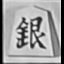

In [49]:
display_image((data[5][0][6][:, :, 0] * 256))

In [70]:
import shogicam.data
import shogicam.util
from shogicam.constant import *

data = shogicam.data.load_validation_board_data('../data/board')
data_sente = shogicam.data.load_validation_board_data('../data/board', True)

x_all = np.empty((0, 64, 64, 1))
y_all = np.empty((0, data[0][1].shape[1]))
for (x, y) in data:
    x_all = np.r_[x_all, x]
    y_all = np.r_[y_all, y]

In [53]:
from scipy.ndimage.interpolation import zoom
# display_image(x_all[0])
# zoomed = zoom(x_all[0], 1.3)
# shp = zoomed.shape
# xstart = int((shp[0] - 64) / 2)
# ystart = int((shp[1] - 64) / 2)
# zoomed = zoomed[xstart:(xstart + 64), ystart:(ystart + 64), :]
# display_image(zoomed)

def zoom_images(imgs, scale=1.3):
    ret = []
    for img in imgs:
        zoomed = zoom(img.reshape(64, 64), scale)
        shp = zoomed.shape
        xstart = int((shp[0] - 64) / 2)
        ystart = int((shp[1] - 64) / 2)
        ret.append(zoomed[xstart:(xstart + 64), ystart:(ystart + 64)].reshape((64, 64, 1)))
    return np.array(ret)

In [67]:
from keras.models import load_model

# model = load_model('../models/purple.h5')
model = load_model('../models/blue3.h5')

In [54]:
n_all = 0
acc_all = 0.0
for (x, y) in data:
#     print(model.evaluate(x, y, verbose=False))
#     print(model.evaluate(zoom_images(x, 1.1), y, verbose=False))
#     print(model.evaluate(zoom_images(x, 1.2), y, verbose=False))
#     print(model.evaluate(zoom_images(x, 1.3), y, verbose=False))
#     print(model.evaluate(zoom_images(x, 1.4), y, verbose=False))
#     print(model.evaluate(zoom_images(x, 1.5), y, verbose=False))
    loss, acc = model.evaluate(x, y, verbose=False)
    losses = [loss]
    accs = [acc]

    scales = [1.1, 1.2, 1.3, 1.4, 1.5]
    for scale in scales:
        loss, acc = model.evaluate(zoom_images(x, scale), y, verbose=False)
        losses.append(loss)
        accs.append(acc)
    print(accs)

    acc = accs[np.argmin(losses)]
#     print(np.argmin(losses))
    print(acc)
    n_all += len(x)
    acc_all += len(x) * acc

print(acc_all / n_all)
# print(model.evaluate(x_all, y_all, verbose=False))
# print(model.evaluate(zoom_images(x_all), y_all, verbose=False))

/usr/local/lib/python3.5/dist-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


[0.97368420738922923, 0.94736841791554505, 0.94736841791554505, 0.94736841791554505, 0.86842104949449239, 0.86842104949449239]
0.973684207389
[0.92307692613357151, 0.94871795024627292, 0.92307692460524726, 0.89743589896422171, 0.794871795635957, 0.71794872024120426]
0.948717950246
[0.97297297297297303, 0.97297297297297303, 0.97297297297297303, 0.97297297297297303, 0.97297297297297303, 0.94594594594594594]
0.972972972973
[0.875, 0.90625, 0.84375, 0.75, 0.6875, 0.625]
0.90625
[0.85714285884584696, 0.48571428656578064, 0.37142857228006637, 0.34285714370863779, 0.25714285714285712, 0.14285714285714285]
0.857142858846
[0.6470588235294118, 0.76470588235294112, 0.73529411764705888, 0.73529411764705888, 0.67647058823529416, 0.6470588235294118]
0.735294117647
[0.86666667461395264, 0.89999997615814209, 0.86666667461395264, 0.86666667461395264, 0.86666667461395264, 0.80000001192092896]
0.866666674614
[0.71428571513720918, 0.77142857228006634, 0.80000000085149492, 0.77142857313156132, 0.8000000017

In [116]:
import shogicam.data
import shogicam.util
from shogicam.constant import *
import keras

x_all, y_all = shogicam.data.load_data('../data')
x_all = x_all.reshape(x_all.shape[0], 64, 64, 1)
x_all /= 255

y_all = keras.utils.to_categorical(y_all[:, 0], NUM_CLASSES)

data = shogicam.data.load_validation_board_data('../data/board')

x_v = np.empty((0, 64, 64, 1))
y_v = np.empty((0, data[0][1].shape[1]))
for (x, y) in data:
    x_v = np.r_[x_v, x]
    y_v = np.r_[y_v, y]

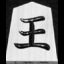

王


In [115]:
import keras
from shogicam.constant import *

display_image(x_all[1][:, :, 0] * 256)
print(get_label(y_all[1][0]))

y_all = keras.utils.to_categorical(y_all[:, 0], NUM_CLASSES)

In [117]:
pred_arr = model.predict(x_all)
res = np.argmax(pred_arr, axis=1)
ans = np.argmax(y_all, axis=1)
correct = np.where(res == ans)[0]
errors = np.where(res != ans)[0]

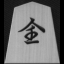

全


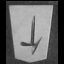

と


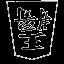

v玉


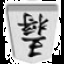

v玉


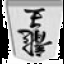

v馬


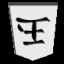

v王


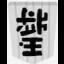

v王


In [118]:
def get_label(idx):
    sente = idx < 15
    if sente:
        return LABELS_JA[idx]
    return 'v' + LABELS_JA[idx - 15]

for e in errors:
    display_image(x_all[e][:, :, 0] * 256)
    print(get_label(res[e]))

In [66]:
np.r_[x_all, x_all].shape

(560, 64, 64, 1)